In [1]:
from engine import Tensor
import numpy as np
import nn

In [13]:
tensor = Tensor.randn((1, 2, 2))
print(tensor)
print(tensor[0, 0, 1])

[[[-0.14188337  0.15544805]
  [ 0.67341644 -1.1051617 ]]]
0.15544805


In [2]:
net = nn.MLP()

In [4]:
optim = nn.Optim(net.parameters, lr=0.005)

In [6]:
for i in net.parameters():
    print(i)

[[-0.78525263 -0.1976684   0.8286483   0.07783645]
 [ 0.789752   -0.31897607  0.7278545   0.28226167]
 [ 0.34771082  1.2519459  -0.10540349 -1.1219637 ]]
[[0. 0. 0. 0.]]
[[-0.8311333  -0.03916978 -0.5791169   0.81499755]
 [ 1.1743072  -0.31018126  0.26971522  0.49442998]
 [-0.14804089 -0.9064749  -0.22339837  1.08463   ]
 [-0.9072176  -0.3917086  -1.2101581  -0.55290174]]
[[0. 0. 0. 0.]]
[[-0.8743847   0.83821577 -0.02944837  0.14807577]
 [ 0.38702255  0.5949118   0.7385529  -0.48044434]
 [-0.9037269  -0.85515994 -0.220084    0.21743107]
 [-1.0241268   0.6509031   0.28726515  0.37080163]]
[[0. 0. 0. 0.]]
[[-0.43041804]
 [-0.04839627]
 [ 0.38061622]
 [-1.0915333 ]]
[[0.]]


In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

0 [1.2643766]
200 [1.0396409e-06]
400 [3.4201324e-08]
600 [1.1274537e-09]
800 [4.5151438e-11]
1000 [5.4427574e-12]
1200 [1.3322676e-12]
1400 [7.8870244e-13]
1600 [5.648815e-13]
1800 [4.938272e-13]
2000 [3.5704772e-13]
2200 [3.1974423e-13]
2400 [2.0428104e-13]
2600 [1.4921397e-13]
2800 [1.2434498e-13]
3000 [1.0658141e-13]
3200 [1.0658141e-13]
3400 [1.0658141e-13]
3600 [1.0658141e-13]
3800 [1.0658141e-13]
4000 [1.0658141e-13]
4200 [8.1712415e-14]
4400 [8.1712415e-14]
4600 [8.1712415e-14]
4800 [8.1712415e-14]
5000 [8.1712415e-14]
5200 [9.2370556e-14]
5400 [8.1712415e-14]
5600 [9.2370556e-14]
5800 [8.1712415e-14]
6000 [9.2370556e-14]
6200 [8.1712415e-14]
6400 [9.2370556e-14]
6600 [8.1712415e-14]
6800 [8.1712415e-14]
7000 [8.1712415e-14]
7200 [8.1712415e-14]
7400 [8.1712415e-14]
7600 [8.1712415e-14]
7800 [8.1712415e-14]
8000 [8.1712415e-14]
8200 [8.1712415e-14]
8400 [8.1712415e-14]
8600 [8.1712415e-14]
8800 [8.1712415e-14]
9000 [9.2370556e-14]
9200 [8.1712415e-14]
9400 [9.2370556e-14]
9600 

[[ 0.99999964]
 [-1.0000001 ]
 [-0.99999964]
 [ 1.0000002 ]]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


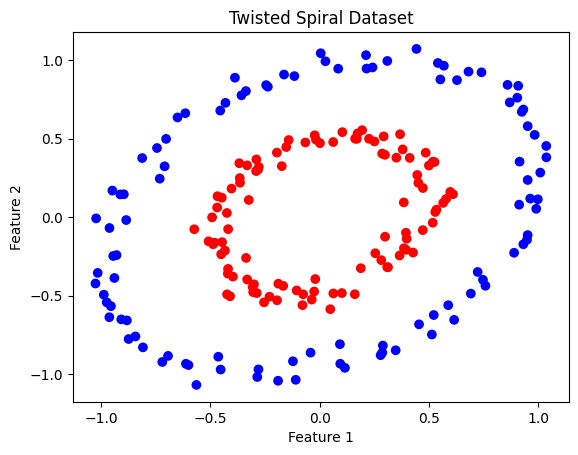

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [3]:
import nn


grads = []
outs = []
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64) # Second hidden layer, 64 neurons
        self.output = nn.Linear(64, 1) # Output layer, 1 output value

    def __call__(self, x):
        x = self.fc1(x).tanh()
        if self.fc1.weight.grad is not None:
            grads.append(np.mean(self.fc1.weight.grad))
        x = self.fc2(x).tanh()
        x = self.output(x)
        outs.append(np.mean(x.data))
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.001, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

epochs = 1000

for epoch in range(epochs):
    y_pred = model(x)
    loss = ((y_pred - y_real)**2).mean(0)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
    
# y_pred

[[-1.0008723  -0.7558607  -1.0463723  ... -0.48092362 -0.95800245
   1.4146249 ]
 [ 0.62084264 -1.2588538   1.1804229  ...  1.8603439   1.5493093
  -0.05075401]
 [ 1.2862853  -0.37137553  1.7577307  ...  1.832073    1.9734623
  -1.1754829 ]
 ...
 [-1.0377592  -0.48255986 -1.1775568  ... -0.7709245  -1.1597855
   1.3226515 ]
 [-0.70061594  0.20751005 -0.9590116  ... -1.0026237  -1.077799
   0.6377619 ]
 [-0.22959013 -0.6084411  -0.10622706 ...  0.28301308  0.02073612
   0.5326814 ]]
[[ 1.546223    0.92323697  0.31795958 ...  0.30748394  0.6136579
  -0.16878265]
 [ 0.07230939 -1.1974282   1.2559747  ...  0.4781973   0.5622297
   0.86764896]
 [-1.2742826  -1.4708221   1.0355954  ...  0.16518025  0.01847274
   1.2171365 ]
 ...
 [ 1.6148521   1.122034    0.05969814 ...  0.2379988   0.4370355
  -0.4280146 ]
 [ 0.90751165  1.109809   -0.6241311  ... -0.06676262 -0.08331905
  -0.7790634 ]
 [ 0.61074036 -0.03829468  0.43791813 ...  0.17872337  0.5048206
   0.24713951]]
[[-1.000898   -0.75589746

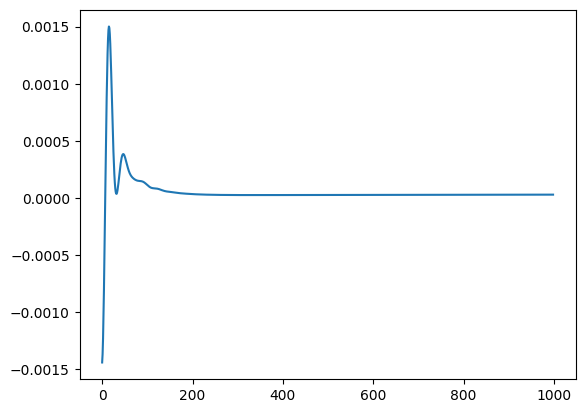

In [53]:
plt.plot(np.arange(0, len(grads), 1), grads)

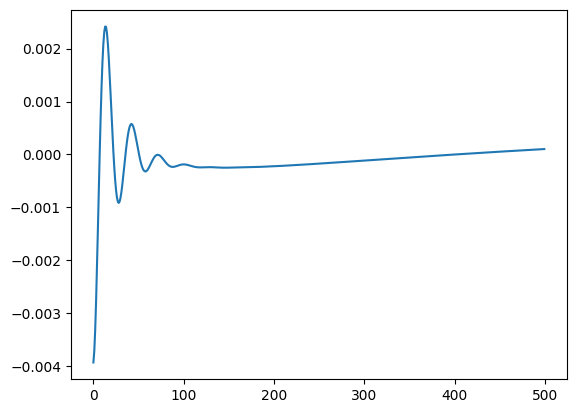

In [51]:
plt.plot(np.arange(0, len(outs), 1), outs)

Epoch [10/500], Loss: 0.9792
Epoch [20/500], Loss: 0.9666
Epoch [30/500], Loss: 0.9542
Epoch [40/500], Loss: 0.9427
Epoch [50/500], Loss: 0.9311
Epoch [60/500], Loss: 0.9191
Epoch [70/500], Loss: 0.9066
Epoch [80/500], Loss: 0.8942
Epoch [90/500], Loss: 0.8817
Epoch [100/500], Loss: 0.8688
Epoch [110/500], Loss: 0.8554
Epoch [120/500], Loss: 0.8414
Epoch [130/500], Loss: 0.8269
Epoch [140/500], Loss: 0.8118
Epoch [150/500], Loss: 0.7959
Epoch [160/500], Loss: 0.7794
Epoch [170/500], Loss: 0.7621
Epoch [180/500], Loss: 0.7442
Epoch [190/500], Loss: 0.7256
Epoch [200/500], Loss: 0.7063
Epoch [210/500], Loss: 0.6862
Epoch [220/500], Loss: 0.6653
Epoch [230/500], Loss: 0.6437
Epoch [240/500], Loss: 0.6213
Epoch [250/500], Loss: 0.5982
Epoch [260/500], Loss: 0.5744
Epoch [270/500], Loss: 0.5501
Epoch [280/500], Loss: 0.5252
Epoch [290/500], Loss: 0.4998
Epoch [300/500], Loss: 0.4741
Epoch [310/500], Loss: 0.4482
Epoch [320/500], Loss: 0.4221
Epoch [330/500], Loss: 0.3962
Epoch [340/500], Lo

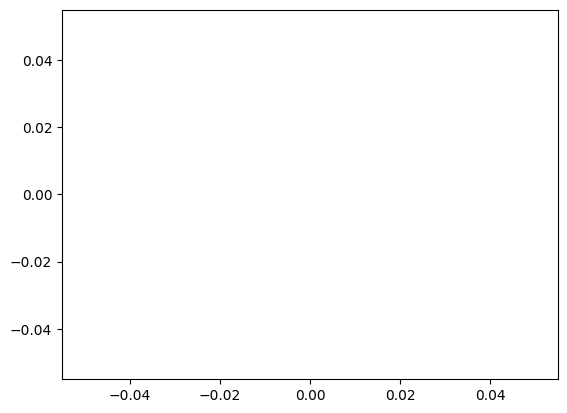

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # First hidden layer, from 2 input features to 64 neurons
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64) # Second hidden layer, 64 neurons
        self.output = nn.Linear(64, 1) # Output layer, 1 output value

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))

        # if self.fc1.weight.grad is not None:
        #     print("fc1 grad: ", torch.mean(self.fc1.weight.grad))
        #     grads.append(torch.mean(self.fc1.weight.grad))
        # if self.fc2.weight.grad is not None:
        #     print("fc2 grad: ", torch.mean(self.fc2.weight.grad))
        x = self.output(x)  # Linear output for regression
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, xs, ys, epochs=500)
plt.plot(np.arange(0, len(grads), 1), grads)

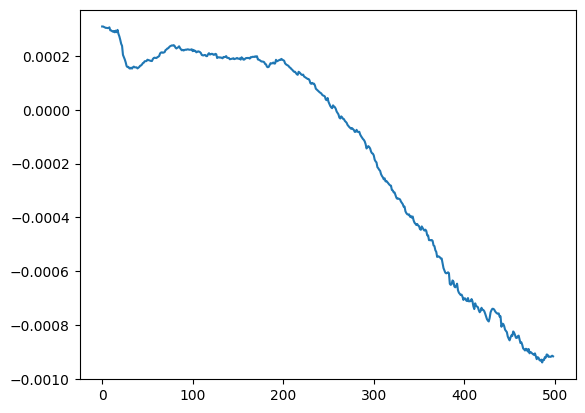

In [55]:
plt.plot(np.arange(0, len(grads), 1), grads)

In [3]:
import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = [random.randint(15, 25) for _ in range(60)]

# List of days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Cycling through days for 60 days
days = [days_of_week[i % 7] for i in range(60)]

# Printing the lists
print("Temperatures:", temperatures)
print("Days:", days)

Temperatures: [21, 19, 15, 19, 16, 23, 19, 18, 15, 19, 15, 20, 25, 19, 19, 23, 17, 24, 19, 16, 16, 18, 16, 21, 24, 22, 22, 15, 20, 16, 15, 25, 25, 18, 20, 25, 21, 15, 15, 18, 22, 22, 21, 19, 25, 24, 19, 19, 20, 19, 19, 17, 24, 16, 20, 17, 15, 15, 18, 24]
Days: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
days = np.arange(1, 61, 1)

In [16]:

import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = [random.randint(15, 25) for _ in range(60)]

smoothing_factor = 0.25
EMA = np.zeros_like(days)
EMA[0] = temperatures[0]

for day in (days - 1):
    EMA[day] = smoothing_factor * temperatures[day] + (1 - smoothing_factor) * EMA[day - 1]

plt.plot(days, temperatures)
plt.plot(days, EMA)
plt.show()

In [19]:
temperatures

[21,
 19,
 15,
 19,
 16,
 23,
 19,
 18,
 15,
 19,
 15,
 20,
 25,
 19,
 19,
 23,
 17,
 24,
 19,
 16,
 16,
 18,
 16,
 21,
 24,
 22,
 22,
 15,
 20,
 16,
 15,
 25,
 25,
 18,
 20,
 25,
 21,
 15,
 15,
 18,
 22,
 22,
 21,
 19,
 25,
 24,
 19,
 19,
 20,
 19,
 19,
 17,
 24,
 16,
 20,
 17,
 15,
 15,
 18,
 24]

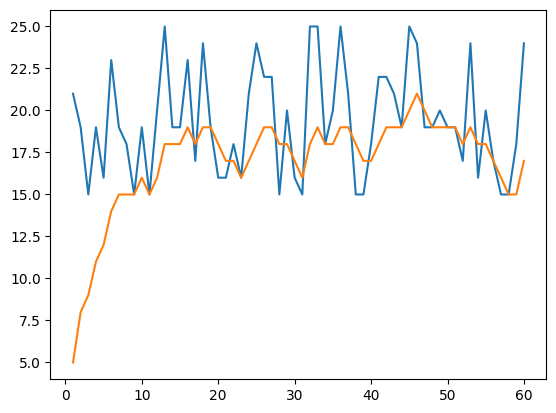

In [18]:
plt.plot(days, temperatures)
plt.plot(days, EMA)
plt.show()

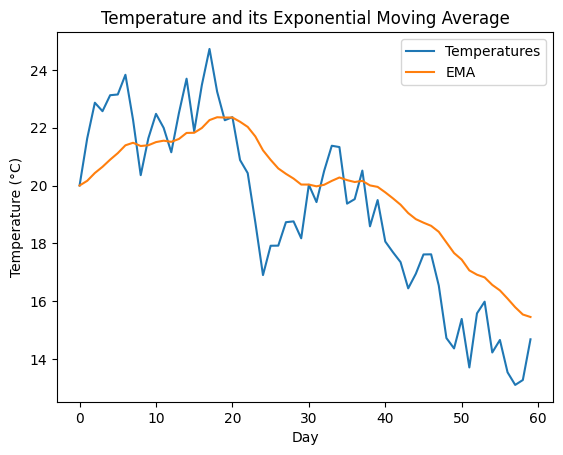

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = generate_temperatures(num_days, start_temp, variability)
days = np.arange(len(temperatures))

smoothing_factor = 0.1
EMA = np.zeros_like(temperatures, dtype=float)
EMA[0] = temperatures[0]  # Initialize the first day's EMA to the first temperature

for day in range(1, len(temperatures)):
    EMA[day] = smoothing_factor * temperatures[day] + (1 - smoothing_factor) * EMA[day - 1]

plt.plot(days, temperatures, label='Temperatures')
plt.plot(days, EMA, label='EMA')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and its Exponential Moving Average')
plt.legend()
plt.show()

In [11]:
momentum = 0.1
damp = 0

der = 0.1

nesterov = False

p = 0

lr = 0.001

vg = 0# will need to be an array
for t in range(100):
    grad = der
    if weight_decay != 0:
        grad = grad + weight_decay * der
    if m != 0:
        if t > 1:
            vg = momentum * vg + (1 - damp) * grad
        else:
            vg = grad
        if nesterov:
            grad = grad + momentum * vg
        else:
            grad = vg
    #update
    p -= lr * grad

NameError: name 'weight_decay' is not defined

In [12]:
# A simple generator function
def my_generator():
    for i in range(5):
        yield i * 2

# Converting the generator to a list
gen = my_generator()
gen_list = list(gen)

In [13]:
gen_list

[0, 2, 4, 6, 8]

In [7]:
my_tensor = Tensor.randn((1, 2)); my_tensor.requires_grad = True
my_tensor[:, 1]._backward()

NotImplementedError: Unsupported indexing type for gradients.